**Handling Imbalanced Dataset with Problem Transformation**

It refers to transforming the multi-label problem into single-label problem(s) by using

*   Binary Relevance: This is probably the simplest which treats each label as a separate single classification problems. The key assumption here though, is that there are no correlation among the various labels.
*   Classifier Chains: In this method, the first classifier is trained on the input X. Then the subsequent classifiers are trained on the input X and all previous classifiers' predictions in the chain. This method attempts to draw the signals from the correlation among preceding target variables.
*   Label Powerset: we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

**Untuk label power set pemilihan angka bebas yang penting hindari angka yang bisa memiliki jumlah sama, misalnya 1 2 3, bisa aja 3 itu dari 1 + 2 atau bisa juga dari angka 3 itu sendiri.**

**Amannya sih pake kelipatannya, kalo aku kelipatan 2, jadi 1 2 4 8 16 32**

## Library

In [1]:
# General Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
!pip install joypy
import joypy
import os
import glob

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Libraries
import sklearn
from scipy import stats
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample #for Bootstrap sampling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, hamming_loss
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.2 MB/s eta 0:00:00


In [3]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

## Data

In [4]:
data = pd.read_csv("ai4i2020.csv", delimiter=',')

In [5]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### Drop Data

In [6]:
data.drop(['UDI','Product ID'],axis=1,inplace=True)

In [7]:
data.shape

(10000, 12)

In [8]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


### Dummy

In [9]:
data = pd.get_dummies(data)

### Another Failure

In [10]:
data['Machine failure'] = data['Machine failure'].astype('str')
data['TWF'] = data['TWF'].astype('str')
data['HDF'] = data['HDF'].astype('str')
data['PWF'] = data['PWF'].astype('str')
data['OSF'] = data['OSF'].astype('str')
data['RNF'] = data['RNF'].astype('str')

In [11]:
pat1 = ['0']
data.loc[data['Machine failure'].str.contains('|'.join(pat1), na = False), 'Type of Failure'] = '0'

pat7 = ['1']
data.loc[data['Machine failure'].str.contains('|'.join(pat7), na = False), 'Type of Failure'] = '6'

pat2 = ['1']
data.loc[data['TWF'].str.contains('|'.join(pat2), na = False), 'Type of Failure'] = '1'

pat3 = ['1']
data.loc[data['HDF'].str.contains('|'.join(pat3), na = False), 'Type of Failure'] = '2'

pat4 = ['1']
data.loc[data['PWF'].str.contains('|'.join(pat4), na = False), 'Type of Failure'] = '3'

pat5 = ['1']
data.loc[data['OSF'].str.contains('|'.join(pat5), na = False), 'Type of Failure'] = '4'

pat6 = ['1']
data.loc[data['RNF'].str.contains('|'.join(pat6), na = False), 'Type of Failure'] = '5'

In [12]:
pat8 = ['6']
data.loc[data['Type of Failure'].str.contains('|'.join(pat8), na = False), 'Another Failure'] = '1'
pat9 = ['0', '1', '2', '3', '4', '5']
data.loc[data['Type of Failure'].str.contains('|'.join(pat9), na = False), 'Another Failure'] = '0'

In [13]:
data = data.astype(int)

### Missing Value

Dilakukan pengecekan apakah terdapat data yang hilang pada tiap feature

In [14]:
data.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
Type_H                     0
Type_L                     0
Type_M                     0
Type of Failure            0
Another Failure            0
dtype: int64

In [15]:
[print(col) for col in data if data[col].isna().sum() > 0]

[]

Dapat disimpulkan bahwa tidak terdapat missing value pada setiap feature

### Duplicates

Dilakukan pengecekan apakah terdapat data yang merupakan duplikasi

In [16]:
data.duplicated().sum()

3

Dapat disimpulkan bahwa tidak terdapat data yang merupakan duplikasi

### Outliers

In [19]:
data.loc[data['Air temperature [K]'] >= data['Air temperature [K]'].quantile(0.95), 'Air temperature [K]_95'] = 1
data.loc[data['Air temperature [K]'] < data['Air temperature [K]'].quantile(0.95), 'Air temperature [K]_95'] = 0
data.loc[data['Air temperature [K]'] >= data['Air temperature [K]'].quantile(0.99), 'Air temperature [K]_99'] = 1
data.loc[data['Air temperature [K]'] < data['Air temperature [K]'].quantile(0.99), 'Air temperature [K]_99'] = 0

In [20]:
data1 = data.copy()

In [21]:
Xc = data1[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Type_L',
         'Type_M',
        ]]
yc = data1[['TWF',	'HDF',	'PWF',	'OSF',	'RNF', 'Another Failure']]

In [22]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.2, random_state = 42)

In [23]:
sc = MinMaxScaler()
Xc_train = sc.fit_transform(Xc_train)
Xc_test = sc.transform(Xc_test)

## Example of Binary Classification

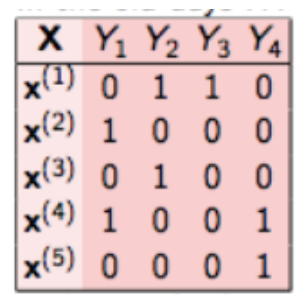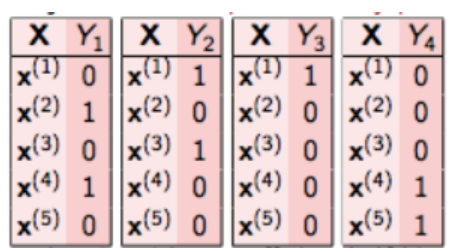

In [24]:
binary_rel_clf = BinaryRelevance(XGBClassifier())

In [25]:
binary_rel_clf.fit(Xc_train,yc_train)

BinaryRelevance(classifier=XGBClassifier(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=None, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=None,
                                         max_leaves=None, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=None,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=None, ...),
                require_dense=[True, True])

In [26]:
# Predictions
br_prediction = binary_rel_clf.predict(Xc_test)

In [27]:
accuracybr = accuracy_score(yc_test, br_prediction)
precisionbr = precision_score(yc_test, br_prediction, average='micro')
recallbr = recall_score(yc_test,br_prediction, average='micro')
f1br = f1_score(yc_test, br_prediction, average='micro')
hlbr = hamming_loss(yc_test, br_prediction)

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracybr))
print("Precision: {:.4f}".format(precisionbr))
print("Recall: {:.4f}".format(recallbr))
print("F1-Score: {:.4f}".format(f1br))
print("Hamming Loss: {:.4f}".format(hlbr))

Micro-average quality numbers
Accuracy: 0.9780
Precision: 0.8000
Recall: 0.5405
F1-Score: 0.6452
Hamming Loss: 0.0037


## Example of Classifier Chain

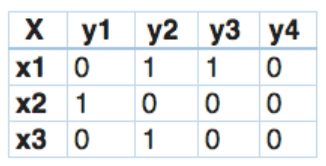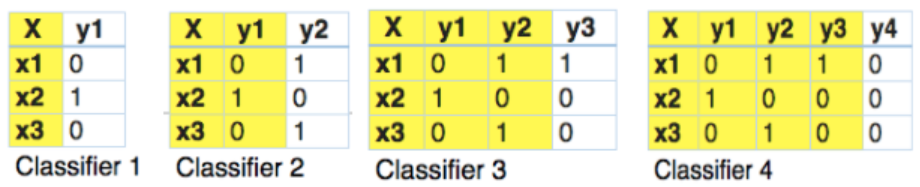

In [28]:
clf_chain = ClassifierChain(XGBClassifier())

In [29]:
clf_chain.fit(Xc_train,yc_train)

ClassifierChain(classifier=XGBClassifier(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=None, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=None,
                                         max_leaves=None, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=None,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=None, ...),
                require_dense=[True, True])

In [30]:
# Predictions
clf_chain_prediction = clf_chain.predict(Xc_test)

In [31]:
accuracych = accuracy_score(yc_test, clf_chain_prediction)
precisionch = precision_score(yc_test, clf_chain_prediction, average='micro')
recallch = recall_score(yc_test, clf_chain_prediction, average='micro')
f1ch = f1_score(yc_test, clf_chain_prediction, average='micro')
hlch = hamming_loss(yc_test, clf_chain_prediction)

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracych))
print("Precision: {:.4f}".format(precisionch))
print("Recall: {:.4f}".format(recallch))
print("F1-Score: {:.4f}".format(f1ch))
print("Hamming Loss: {:.4f}".format(hlch))

Micro-average quality numbers
Accuracy: 0.9780
Precision: 0.8000
Recall: 0.5405
F1-Score: 0.6452
Hamming Loss: 0.0037


## Example of Label PowerSet

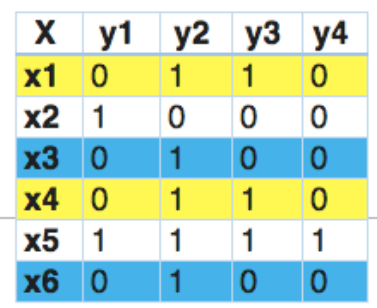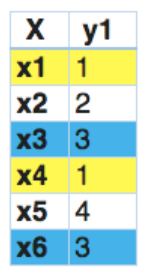

In [32]:
clf_labelP = LabelPowerset(XGBClassifier())

In [33]:
clf_labelP.fit(Xc_train,yc_train)

LabelPowerset(classifier=XGBClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=None, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='multi:softprob', ...),
              require_dense=[True, True])

In [34]:
# Predictions
clf_labelP_prediction = clf_labelP.predict(Xc_test)

In [35]:
accuracylp = accuracy_score(yc_test, clf_labelP_prediction)
precisionlp = precision_score(yc_test, clf_labelP_prediction, average='micro')
recalllp = recall_score(yc_test, clf_labelP_prediction, average='micro')
f1lp = f1_score(yc_test, clf_labelP_prediction, average='micro')
hllp = hamming_loss(yc_test, clf_labelP_prediction)

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracylp))
print("Precision: {:.4f}".format(precisionlp))
print("Recall: {:.4f}".format(recalllp))
print("F1-Score: {:.4f}".format(f1lp))
print("Hamming Loss: {:.4f}".format(hllp))

Micro-average quality numbers
Accuracy: 0.9760
Precision: 0.7600
Recall: 0.5135
F1-Score: 0.6129
Hamming Loss: 0.0040


![image.png]()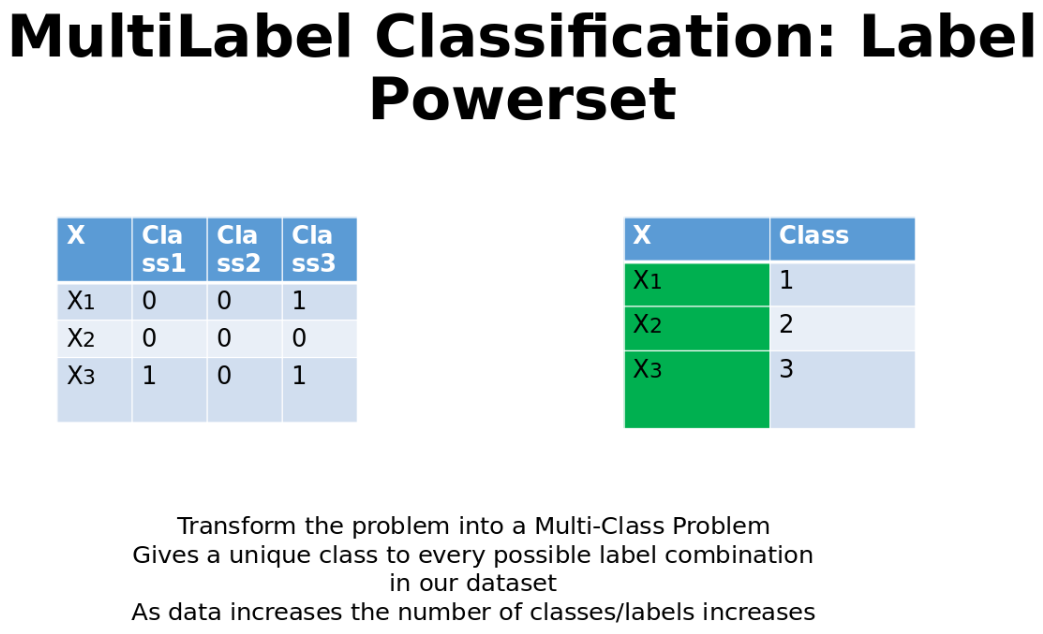

<Axes: >

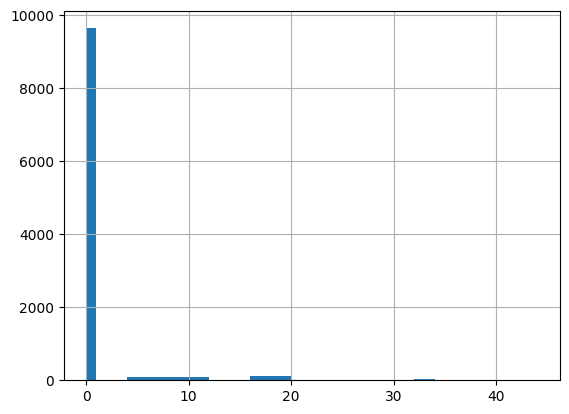

In [36]:
#Applying Label Powerset Tranformation
data1['powerlabel'] = data1.apply(lambda x : 32*x["TWF"]+16*x["HDF"]+8*x["PWF"]+4*x["OSF"]+2*x["RNF"]+1*x["Another Failure"],axis=1)
data1['powerlabel'].hist(bins=np.unique(data1['powerlabel']))

**Splitting Dataset**

In [37]:
data1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Type of Failure,Another Failure,Air temperature [K]_95,Air temperature [K]_99,powerlabel
0,298,308,1551,42,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0
1,298,308,1408,46,3,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0
2,298,308,1498,49,5,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0
3,298,308,1433,39,7,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0
4,298,308,1408,40,9,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298,308,1604,29,14,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0
9996,298,308,1632,31,17,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
9997,299,308,1645,33,22,0,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0
9998,299,308,1408,48,25,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0


In [38]:
Xf = data1[['Air temperature [K]',
         'Process temperature [K]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Type_L',
         'Type_M',
        ]]
yf = data1[['powerlabel']]

In [39]:
from sklearn.model_selection import train_test_split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xf_train = sc.fit_transform(Xf_train)
Xf_test = sc.transform(Xf_test)

**Handling Imbalanced Dataset**

In [41]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)
# oversamp = SMOTE(n_jobs=-1)

In [42]:
Xf_train_res,yf_train_res = oversamp.fit_resample(Xf_train, yf_train)

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xf_train = sc.fit_transform(Xf_train_res)
Xf_test = sc.transform(Xf_test)

**Modeling (KNN)**

In [44]:
modelknnf =KNeighborsClassifier()
modelknnf.fit(Xf_train, yf_train_res)
yknn_predf = modelknnf.predict(Xf_test)

In [45]:
accuracyf = accuracy_score(yf_test, yknn_predf)
precisionf = precision_score(yf_test, yknn_predf, average='micro')
recallf = recall_score(yf_test, yknn_predf, average='micro')
f1f = f1_score(yf_test, yknn_predf, average='micro')
hlf = hamming_loss(yf_test, yknn_predf)

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracyf))
print("Precision: {:.4f}".format(precisionf))
print("Recall: {:.4f}".format(recallf))
print("F1-Score: {:.4f}".format(f1f))
print("Hamming Loss: {:.4f}".format(hlf))

Micro-average quality numbers
Accuracy: 0.9455
Precision: 0.9455
Recall: 0.9455
F1-Score: 0.9455
Hamming Loss: 0.0545
